In [1]:
import numpy as np
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.integrate import tplquad
from scipy.integrate import dblquad
from scipy.integrate import odeint
from IPython.display import HTML

In [30]:
coordinates = np.loadtxt('spin.txt', unpack=True, delimiter=',', dtype=int)
coordinates[[1, 2]] = coordinates[[2, 1]] 
coordinates = coordinates/max(coordinates.ravel()) 
x_mean, y_mean, z_max = np.mean(coordinates[0]), np.mean(coordinates[1]), max(coordinates[2])
P0 = x_mean, y_mean, z_max
coordinates = coordinates.T - P0
coordinates = coordinates.T
coordinates[2] = -coordinates[2]
x, y, z = coordinates
np.shape(x)

(244187,)

In [3]:
mass = np.ones(len(x))

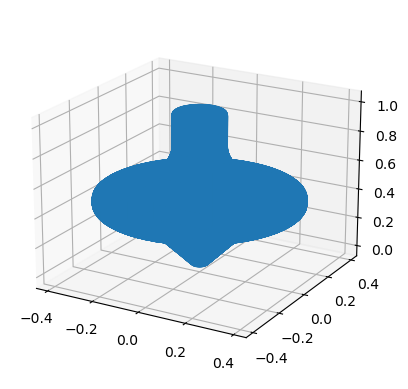

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.view_init(elev=20)

In [26]:
Ixx = sum(mass*(coordinates[1]**2 + coordinates[2]**2))/sum(mass)
Iyy = sum(mass*(coordinates[0]**2 + coordinates[2]**2))/sum(mass)
Izz = sum(mass*(coordinates[0]**2 + coordinates[1]**2))/sum(mass)
Ixy = sum(mass*coordinates[0]*coordinates[1])/sum(mass)
Iyz = sum(mass*coordinates[1]*coordinates[2])/sum(mass)
Ixz = sum(mass*coordinates[0]*coordinates[2])/sum(mass)
I = np.array([[Ixx, Ixy, Ixz],[Ixy, Iyy, Iyz],[Ixz, Iyz, Izz]])
for i in range(len(I)):
    for j in range(len(I[i])):
        if(I[i][j]< 0.001):
            I[i][j] = 0
I

array([[0.30205116, 0.        , 0.        ],
       [0.        , 0.30205366, 0.        ],
       [0.        , 0.        , 0.07279514]])

In [37]:
t, h, g = smp.symbols('t h g', real=True)
the, phi, psi = smp.symbols(r'\theta \phi \psi', cls=smp.Function)
the = the(t)
phi = phi(t)
psi = psi(t)
# Derivatives
the_d = smp.diff(the,t)
phi_d = smp.diff(phi,t)
psi_d = smp.diff(psi,t)
# Second derivatives
the_dd = smp.diff(the_d,t)
phi_dd = smp.diff(phi_d,t)
psi_dd = smp.diff(psi_d,t)

In [38]:
R3 = smp.Matrix([[smp.cos(psi),-smp.sin(psi),0],
                 [smp.sin(psi),smp.cos(psi),0],
                 [0,0,1]])

R2 = smp.Matrix([[1,0,0],
                 [0,smp.cos(the),-smp.sin(the)],
                 [0,smp.sin(the),smp.cos(the)]])

R1 = smp.Matrix([[smp.cos(phi),-smp.sin(phi),0],
                 [smp.sin(phi),smp.cos(phi),0],
                 [0,0,1]])

R = R1*R2*R3

In [39]:
R@smp.Matrix([0,0,1])

Matrix([
[ sin(\phi(t))*sin(\theta(t))],
[-sin(\theta(t))*cos(\phi(t))],
[              cos(\theta(t))]])

In [40]:
omega = smp.Matrix([phi_d*smp.sin(the)*smp.sin(psi)+the_d*smp.cos(psi),
                    phi_d*smp.sin(the)*smp.cos(psi)-the_d*smp.sin(psi),
                    phi_d*smp.cos(the)+psi_d])
omega

Matrix([
[ sin(\psi(t))*sin(\theta(t))*Derivative(\phi(t), t) + cos(\psi(t))*Derivative(\theta(t), t)],
[-sin(\psi(t))*Derivative(\theta(t), t) + sin(\theta(t))*cos(\psi(t))*Derivative(\phi(t), t)],
[                             cos(\theta(t))*Derivative(\phi(t), t) + Derivative(\psi(t), t)]])

In [41]:
Ixx, Iyy, Izz, Ixy, Iyz, Ixz = smp.symbols('I_{xx}, I_{yy}, I_{zz}, I_{xy}, I_{yz}, I_{xz}', real=True)
I = smp.Matrix([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])

In [42]:
T = smp.Rational(1,2)*omega.T.dot(I*omega).simplify()
V = g*h*smp.cos(the)
L = T-V

In [43]:
LE1 = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, phi) - smp.diff(smp.diff(L, phi_d), t)
LE2 = LE2.simplify()

LE3 = smp.diff(L, psi) - smp.diff(smp.diff(L, psi_d), t)
LE3 = LE3.simplify()
LE1

I_{xx}*sin(2*\psi(t) - 2*\theta(t))*Derivative(\phi(t), t)**2/8 + I_{xx}*sin(2*\psi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t)/2 - I_{xx}*sin(2*\psi(t) + \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t)/2 - I_{xx}*sin(2*\psi(t) + 2*\theta(t))*Derivative(\phi(t), t)**2/8 + I_{xx}*sin(2*\psi(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) + I_{xx}*sin(2*\theta(t))*Derivative(\phi(t), t)**2/4 - I_{xx}*cos(2*\psi(t) - \theta(t))*Derivative(\phi(t), (t, 2))/4 + I_{xx}*cos(2*\psi(t) + \theta(t))*Derivative(\phi(t), (t, 2))/4 - I_{xx}*cos(2*\psi(t))*Derivative(\theta(t), (t, 2))/2 - I_{xx}*Derivative(\theta(t), (t, 2))/2 + I_{xy}*sin(2*\psi(t) - \theta(t))*Derivative(\phi(t), (t, 2))/2 - I_{xy}*sin(2*\psi(t) + \theta(t))*Derivative(\phi(t), (t, 2))/2 + I_{xy}*sin(2*\psi(t))*Derivative(\theta(t), (t, 2)) + I_{xy}*cos(2*\psi(t) - 2*\theta(t))*Derivative(\phi(t), t)**2/4 + I_{xy}*cos(2*\psi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) - I_{xy}*cos(

In [12]:
sols = smp.solve([LE1, LE2, LE3], (the_dd, phi_dd, psi_dd),
                simplify=False, rational=False)

In [13]:
LE1

I_{xx}*sin(2*\psi(t) - 2*\theta(t))*Derivative(\phi(t), t)**2/8 + I_{xx}*sin(2*\psi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t)/2 - I_{xx}*sin(2*\psi(t) + \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t)/2 - I_{xx}*sin(2*\psi(t) + 2*\theta(t))*Derivative(\phi(t), t)**2/8 + I_{xx}*sin(2*\psi(t))*Derivative(\psi(t), t)*Derivative(\theta(t), t) + I_{xx}*sin(2*\theta(t))*Derivative(\phi(t), t)**2/4 - I_{xx}*cos(2*\psi(t) - \theta(t))*Derivative(\phi(t), (t, 2))/4 + I_{xx}*cos(2*\psi(t) + \theta(t))*Derivative(\phi(t), (t, 2))/4 - I_{xx}*cos(2*\psi(t))*Derivative(\theta(t), (t, 2))/2 - I_{xx}*Derivative(\theta(t), (t, 2))/2 + I_{xy}*sin(2*\psi(t) - \theta(t))*Derivative(\phi(t), (t, 2))/2 - I_{xy}*sin(2*\psi(t) + \theta(t))*Derivative(\phi(t), (t, 2))/2 + I_{xy}*sin(2*\psi(t))*Derivative(\theta(t), (t, 2)) + I_{xy}*cos(2*\psi(t) - 2*\theta(t))*Derivative(\phi(t), t)**2/4 + I_{xy}*cos(2*\psi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\psi(t), t) - I_{xy}*cos(

In [14]:
dz1dt_f = smp.lambdify((g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,the_d,phi_d,psi_d), sols[the_dd])
dthedt_f = smp.lambdify(the_d, the_d)

dz2dt_f = smp.lambdify((g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,the_d,phi_d,psi_d), sols[phi_dd])
dphidt_f = smp.lambdify(phi_d, phi_d)

dz3dt_f = smp.lambdify((g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,the_d,phi_d,psi_d), sols[psi_dd])
dpsidt_f = smp.lambdify(psi_d, psi_d)

F:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [15]:
def dSdt(S, t):
    the, z1, phi, z2, psi, z3 = S
    return [
        dthedt_f(z1),
        dz1dt_f(g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,z1,z2,z3),
        dphidt_f(z2),
        dz2dt_f(g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,z1,z2,z3),
        dpsidt_f(z3),
        dz3dt_f(g, h, Ixx,Iyy,Izz,Ixy,Iyz,Ixz,the,phi,psi,z1,z2,z3),
    ]

In [31]:
mass2 = z**2 + np.exp(x)
Ixx = sum(mass2*(coordinates[1]**2 + coordinates[2]**2))/sum(mass2)
Iyy = sum(mass2*(coordinates[0]**2 + coordinates[2]**2))/sum(mass2)
Izz = sum(mass2*(coordinates[0]**2 + coordinates[1]**2))/sum(mass2)
Ixy = sum(mass2*coordinates[0]*coordinates[1])/sum(mass2)
Iyz = sum(mass2*coordinates[1]*coordinates[2])/sum(mass2)
Ixz = sum(mass2*coordinates[0]*coordinates[2])/sum(mass2)
I = np.array([[Ixx, Ixy, Ixz],[Ixy, Iyy, Iyz],[Ixz, Iyz, Izz]])
for i in range(len(I)):
    for j in range(len(I[i])):
        if(I[i][j]< 0.001):
            I[i][j] = 0
g = 9.8/0.05

h = np.sum(mass2*coordinates[2])/sum(mass2)

In [32]:
t = np.linspace(0, 2, 10000)
# Initial Condition 1
ans = odeint(dSdt, y0=[np.pi/4, 0, 0, 10, 0, 2*np.pi*60], t=t)
the_t = ans.T[0]
phi_t = ans.T[2]
psi_t = ans.T[4]
x_t = np.sin(phi_t)*np.sin(the_t)
y_t = -np.cos(phi_t)*np.sin(the_t)
z_t = np.cos(the_t)

In [33]:
plt.plot(t,the_t)
x_t

array([0.        , 0.00130754, 0.00240214, ..., 0.64890457, 0.64381949,
       0.63864001])

In [40]:
i = 0
f= 1000
layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(layout=layout)
fig.add_scatter3d(x=[0],y=[0],z=[0])
fig.add_scatter3d(x=x_t[i:f],y=y_t[i:f],z=z_t[i:f], mode='lines',
                  line = dict(color='green', width=10))

fig.update_layout(
    scene = dict(xaxis = dict(range=[-1,1],),
                 yaxis = dict(range=[-1,1],),
                 zaxis = dict(range=[-1,1],),))

HTML(fig.to_html(default_width=600, default_height=600))

<IPython.core.display.Javascript object>


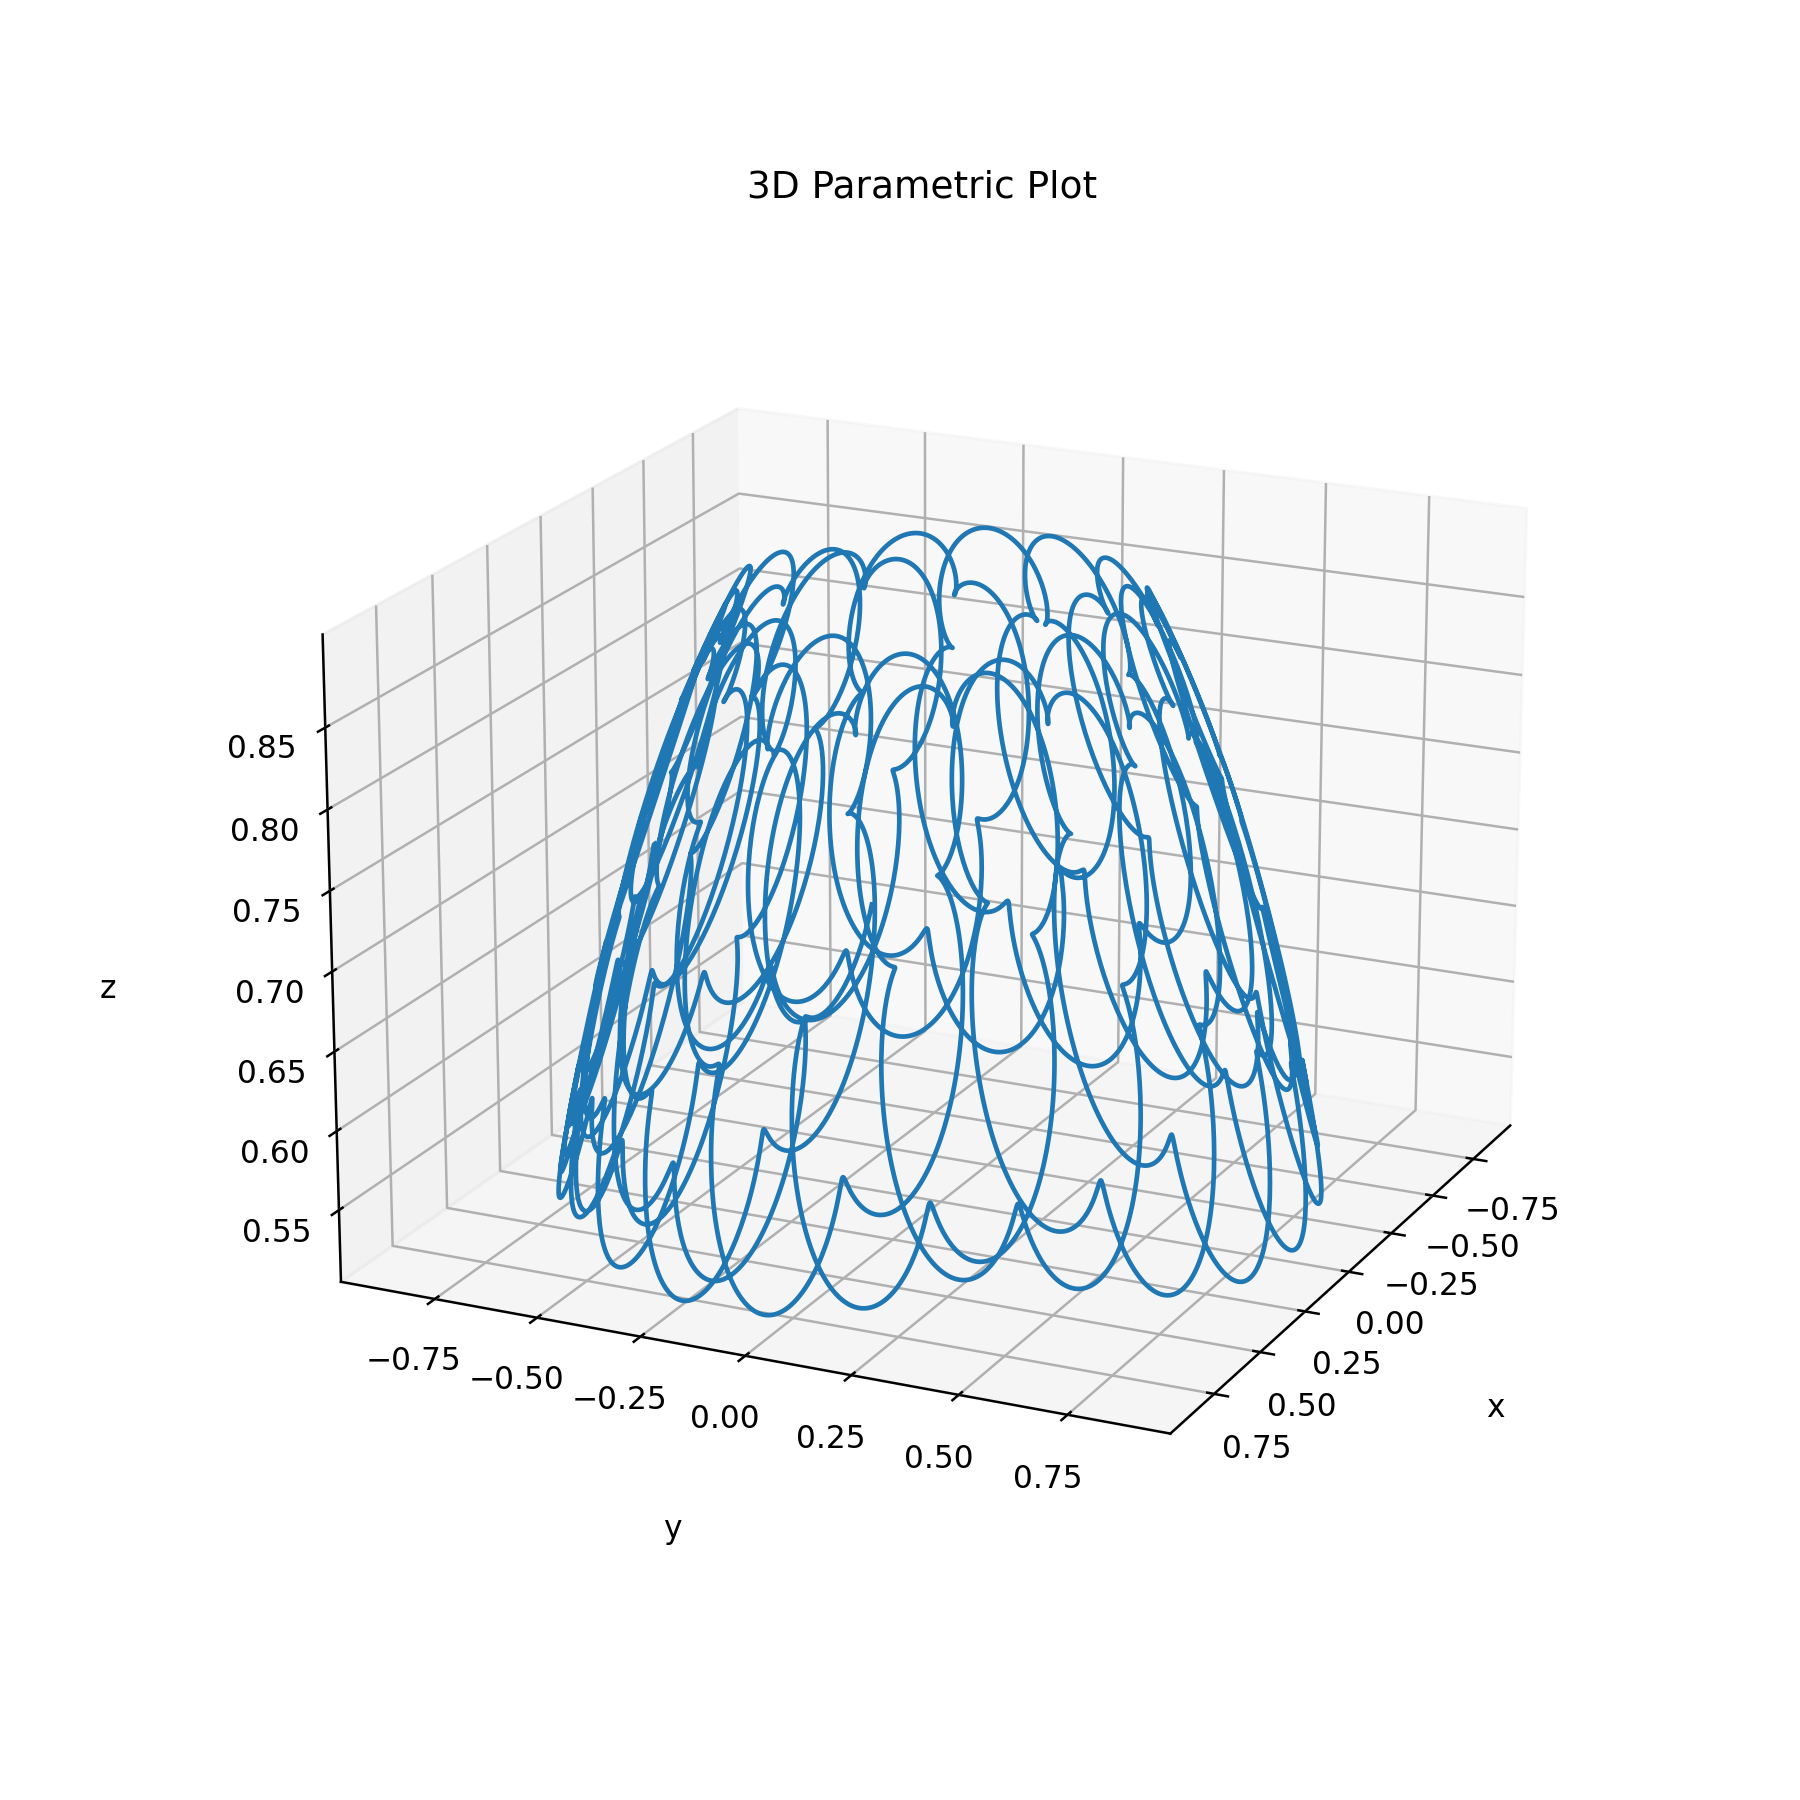

In [34]:
%matplotlib notebook
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
ax.plot3D(x_t, y_t, z_t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()